# INSURANCE PREMIUM PREDICTIOR

In this project we will be building several model which best fits the provided dataset in order to predict insurance premium based on people medical expenses.

In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [68]:
#Reading Insurance dataset provided with the project in .csv format, and showing partly how the data looks like
dataset = pd.read_csv('../Dataset/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Findings
#### 1. There is no missing values in any column
#### 2. There are 3 categorical variable
#### 3. Total Number of columns is 1338

<AxesSubplot:>

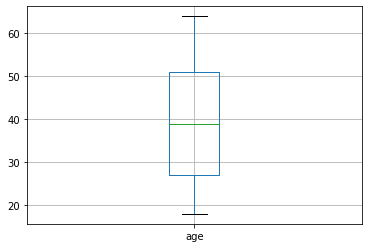

In [7]:
dataset.boxplot("age")
# Finding by seeing boxplot
# 1. Atleast 50% people that are purchasing insurance are between age 27 and 51.
# 2. Median Age is 39.
# 3. The youngest person that have insurance is 18, which could be the minimum age required for insurance.
# 4. Maximum age the people are willing to purchase insurance is 64

<AxesSubplot:>

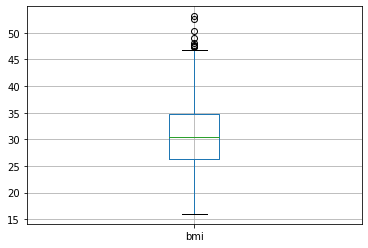

In [8]:
dataset.boxplot("bmi")
#BMI Score and Meaning: <18 : Underweight, 18 to 25 : Normal, 25> : Overweight and obease
# Finding by seeing boxplot
# 1. Atleast 50% people have bmi between 26 and 35 which is overweight and obese category, 
# 2. Atleast 75% people is in the category of overweight or obease and this may imply that overall policyholder could be unhealthy
# 3. Around 25% people have bmi between 26 and and 14, which indicates that people have normal or underweight bmi.
# 4. This box plot have outlier, find the link to understand more about outliers
#    -> https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#    -> https://medium.com/analytics-vidhya/its-all-about-outliers-cbe172aa1309

<AxesSubplot:>

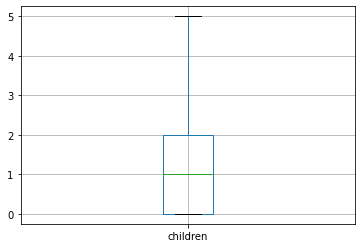

In [9]:
dataset.boxplot("children")
# Finding by seeing boxplot
# 1. Atleast 75% people have 2 child or less.
# 2. Around 25% people have more than 2 children.
# 3. Atleast 50% people have 1 child or less.

<AxesSubplot:>

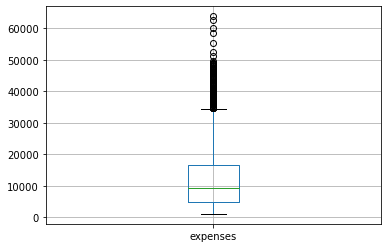

In [10]:
dataset.boxplot("expenses")
#Findings 

<AxesSubplot:title={'center':'expenses'}, xlabel='smoker'>

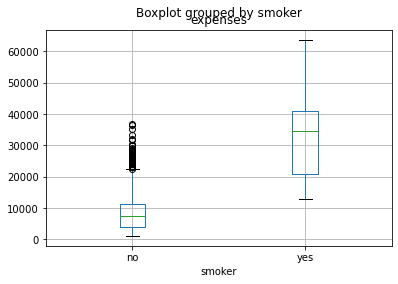

In [11]:
dataset.boxplot("expenses",by="smoker", )
#Findings 

In [12]:
#lets see what could data tell us more
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [13]:
dataset.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [14]:
dataset.cov()

,age,bmi,children,expenses
age,197.401387,9.368560,0.719303,5.087480e+04
bmi,9.368560,37.190265,0.092958,1.466515e+04
children,0.719303,0.092958,1.453213,9.926742e+02
expenses,50874.802133,14665.149703,992.674243,1.466524e+08


In [15]:
dataset.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [16]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

### Lets find out duplicate values if any

In [17]:
dataset.duplicated().value_counts()

False    1337
True        1
dtype: int64

### There is one duplicate values, we will drop this value

In [18]:
dataset.drop_duplicates(inplace=True)

In [19]:
dataset.duplicated().value_counts()
#Now no duplicate values are there.

False    1337
dtype: int64

<AxesSubplot:>

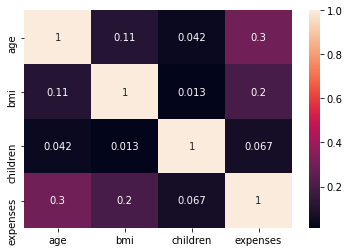

In [20]:
sb.heatmap(dataset.corr(), annot=True)

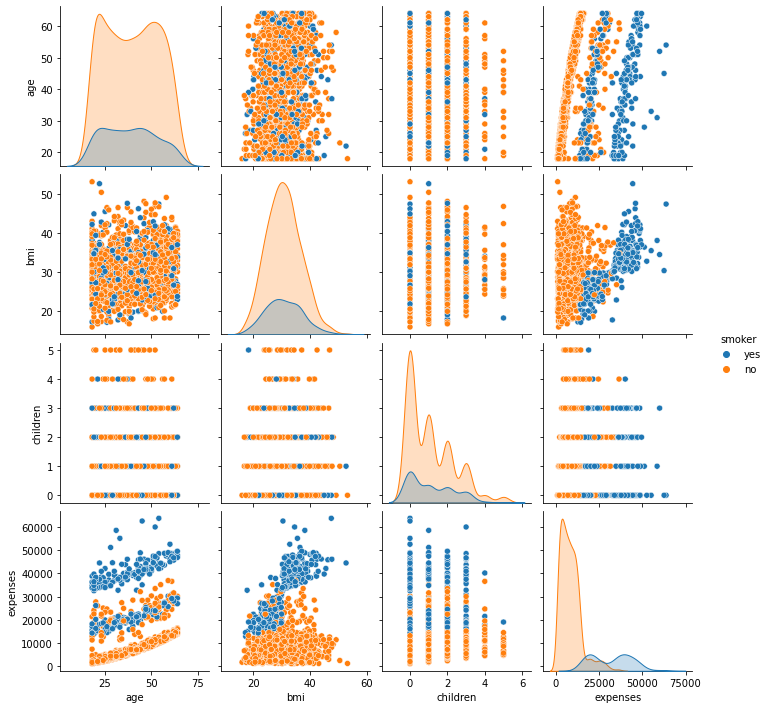

In [21]:
sb.pairplot(dataset, hue="smoker")

## Now lets encode dummy variable. We will perform different encoding techniques and see difference in result if any.

In [22]:
#We know there are 3 categorical variable, which is sex, smoker, region.
#Firstly we will be applying one hot encoding technique to create dummy variables. Also to avoid dummy variable trap, 
# will drop one of the column, probably first one

## One Hot Encoding

In [65]:
# 1. By One hot encoding
dataset_oh = pd.get_dummies(dataset, drop_first=True)

In [24]:
dataset_oh.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [25]:
# Separating dependent variable and independent varaiable, here y is our dependent variable(output) and X is independent variable
y = dataset_oh['expenses']
dataset_oh.drop(columns=['expenses'], inplace=True)
X = dataset_oh

## Making our first regression model to predict medical expense

In [26]:
# Dividing our dataset to training and test data set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [27]:
X_train.count()

age                 891
bmi                 891
children            891
sex_male            891
smoker_yes          891
region_northwest    891
region_southeast    891
region_southwest    891
dtype: int64

In [28]:
y_test.values

array([ 4454.4 , 11289.11, 40273.65, 33732.69,  9541.7 , 22144.03,
        7518.03,  8798.59, 33750.29,  1759.34, 37465.34, 19199.94,
        6373.56,  2483.74, 13974.46, 42124.52,  2719.28, 13635.64,
        2134.9 , 12950.07,  9880.07, 60021.4 ,  8428.07,  4992.38,
        3353.47,  3875.73,  3208.79,  9869.81,  7133.9 ,  7445.92,
       27346.04,  7443.64,  4185.1 ,  6117.49, 25517.11,  5240.77,
        7371.77,  4686.39, 11837.16, 17085.27,  7441.05,  4571.41,
        7337.75,  2855.44,  1972.95,  8782.47, 12404.88, 19673.34,
        1631.82,  3471.41, 13770.1 , 20234.85,  3935.18, 11657.72,
       24106.91, 10264.44, 28468.92,  9566.99, 43943.88, 10796.35,
        2304.  , 13129.6 , 10381.48, 24393.62, 10560.49,  8527.53,
        2709.11,  6600.21, 47403.88,  8930.93,  2362.23,  3021.81,
        3238.44, 15359.1 ,  3972.92,  9875.68, 11482.63,  3070.81,
        2710.83, 25309.49, 18246.5 , 22462.04, 16085.13,  7985.82,
        8688.86, 11879.1 ,  5966.89,  4237.13,  2457.5 ,  6113

In [29]:
dataset.shape[0]*2/3

891.3333333333334

In [30]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()

In [31]:
linearModel.fit(X_train, y_train)

LinearRegression()

In [32]:
y_predict = linearModel.predict(X_test)

In [33]:
y_predict.shape

(446,)

In [34]:
linearModel.score(X_test, y_test)
# We are getting 78.2% accuracy using one hot encoding.

0.7902165530341599

## Our first model of linear regression gave an 78.2 % accuracy

## Linear Regression with Cross Validation

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
# parameter={'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-35, 1, 5, 10, 15, 20, 25, 50, 75, 100, 150]}
mse = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-41567176.97556175


## Ridge Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameter={'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-35, 1, 5, 10, 15, 20, 25, 50, 75, 100, 150]}
ridge_Regression = GridSearchCV(ridge, parameter, scoring='neg_mean_squared_error', cv=5)
# ridge_Regression.fit(X,y)

In [37]:
ridge_Regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 1e-35, 1, 5, 10,
                                   15, 20, 25, 50, 75, 100, 150]},
             scoring='neg_mean_squared_error')

In [38]:
print(ridge_Regression.best_params_)
print(ridge_Regression.best_score_)

{'alpha': 1e-05}
-41567176.909979254


In [39]:
ridge_Regression.score(X_test, y_test)

-28308773.70658196

## Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameter={'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-35, 1, 5, 10, 15, 20, 25, 50, 75, 100, 150]}
lasso_Regression = GridSearchCV(lasso, parameter, scoring='neg_mean_squared_error', cv=5)
# lasso_Regression.fit(X,y)

In [41]:
lasso_Regression.fit(X_train, y_train)

C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14737472308.408543, tolerance: 11256580.747934476
  model = cd_fast.enet_coordinate_descent(
C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14396429089.467207, tolerance: 10813599.03558189
  model = cd_fast.enet_coordinate_descent(
C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14023002311.295189, tolerance: 10674691.555188803
  model = cd_fast.enet_coordinate_descent(
C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 1e-35, 1, 5, 10,
                                   15, 20, 25, 50, 75, 100, 150]},
             scoring='neg_mean_squared_error')

In [42]:
print(lasso_Regression.best_params_)
print(lasso_Regression.best_score_)

{'alpha': 20}
-41525661.40705273


In [43]:
lasso_Regression.score(X_test, y_test)

-28348458.696982518

## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

In [45]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [46]:
regressor.score(X_test, y_test)

0.6716086402808454

In [47]:
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

[Text(931.6280323949353, 530.01, 'X[4] <= 0.5\nmse = 151740386.397\nsamples = 891\nvalue = 13734.405'),
 Text(613.8482571879898, 502.83000000000004, 'X[0] <= 43.5\nmse = 39875940.811\nsamples = 697\nvalue = 8674.576'),
 Text(349.9599315487852, 475.65000000000003, 'X[2] <= 0.5\nmse = 26036538.71\nsamples = 401\nvalue = 5696.571'),
 Text(132.17105701410657, 448.47, 'X[0] <= 22.5\nmse = 19671408.287\nsamples = 177\nvalue = 4039.379'),
 Text(66.37182601880878, 421.29, 'X[1] <= 29.1\nmse = 14670729.077\nsamples = 88\nvalue = 2764.703'),
 Text(32.535423197492165, 394.11, 'X[0] <= 19.5\nmse = 150615.78\nsamples = 37\nvalue = 1842.709'),
 Text(18.54169278996865, 366.93000000000006, 'X[3] <= 0.5\nmse = 74566.124\nsamples = 24\nvalue = 1642.886'),
 Text(9.095924764890281, 339.75, 'X[6] <= 0.5\nmse = 57818.286\nsamples = 8\nvalue = 1868.096'),
 Text(5.597492163009404, 312.57000000000005, 'X[7] <= 0.5\nmse = 47854.337\nsamples = 6\nvalue = 1953.582'),
 Text(2.798746081504702, 285.39000000000004, '

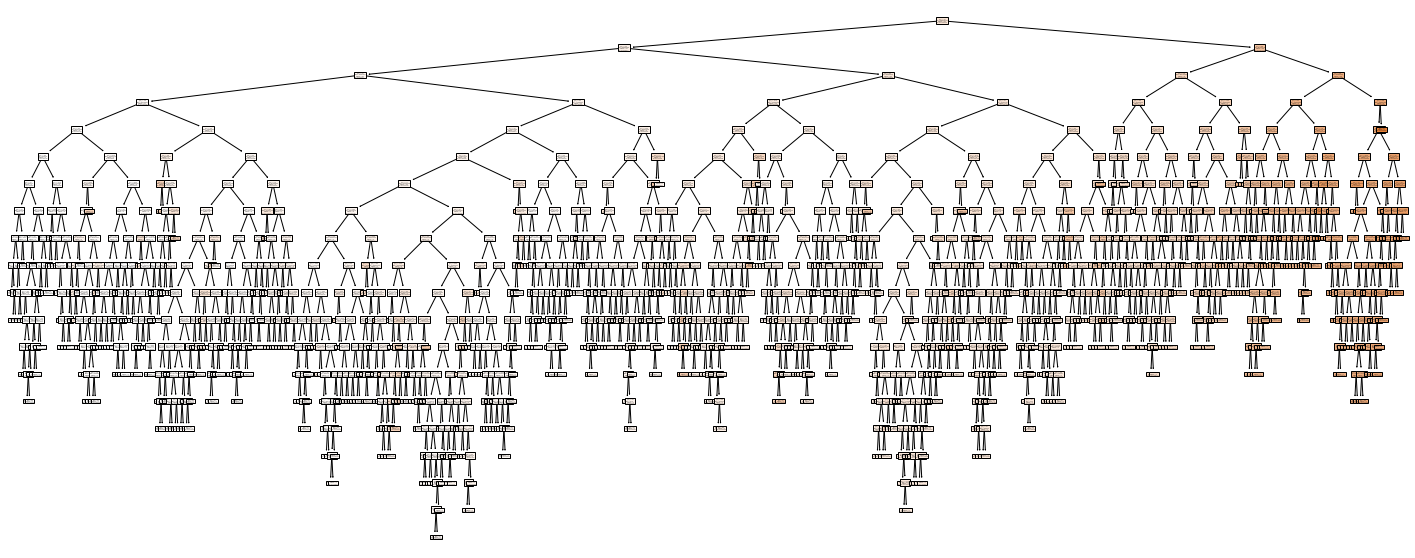

In [48]:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(regressor, filled=True)

In [49]:
print(tree.export_text(regressor))

|--- feature_4 <= 0.50
|   |--- feature_0 <= 43.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_0 <= 22.50
|   |   |   |   |--- feature_1 <= 29.10
|   |   |   |   |   |--- feature_0 <= 19.50
|   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 23.80
|   |   |   |   |   |   |   |   |   |   |--- value: [2117.34]
|   |   |   |   |   |   |   |   |   |--- feature_1 >  23.80
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 25.70
|   |   |   |   |   |   |   |   |   |   |   |--- value: [2196.47]
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  25.70
|   |   |   |   |   |   |   |   |   |   |   |--- value: [2198.19]
|   |   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 21.65
|   |   |   |   |   |   |   |   |   |   |--- value: [1728.90]
|   |   |   |   |   |   | 

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=400, max_depth=4, random_state=13, min_samples_split=20)

In [51]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=20, n_estimators=400,
                      random_state=13)

In [52]:
rf_regressor.score(X_test, y_test)

0.8969493457060547

## KNN Regressor

In [56]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [57]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [58]:
knn_regressor.score(X_test, y_test)

0.1740403829085253

## Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [92]:
dataset_oh = pd.get_dummies(dataset, drop_first=True)
dataset_oh

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [93]:
df_sc = pd.DataFrame(scaler.transform(dataset_oh), columns=dataset_oh.columns)

In [94]:
# Separating dependent variable and independent varaiable, here y is our dependent variable(output) and X is independent variable
ys = df_sc['expenses']
df_sc.drop(columns=['expenses'], inplace=True)
Xs = df_sc

In [99]:
X_trains, X_tests, y_trains, y_tests = train_test_split(Xs, ys, test_size = 1/3)

In [100]:
X_trains

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
836,-0.229512,0.136836,-0.909234,0.990324,-0.507702,-0.565546,-0.611638,1.764609
305,-0.728120,0.431997,0.750351,0.990324,-0.507702,1.768203,-0.611638,-0.566698
1167,-0.728120,-0.994611,0.750351,-1.009771,-0.507702,-0.565546,-0.611638,1.764609
97,1.123853,1.251886,-0.909234,0.990324,-0.507702,-0.565546,1.634955,-0.566698
643,-1.155499,0.710759,1.580143,-1.009771,-0.507702,1.768203,-0.611638,-0.566698
...,...,...,...,...,...,...,...,...
703,-0.371972,-0.699451,-0.079442,-1.009771,-0.507702,1.768203,-0.611638,-0.566698
1321,1.622461,-0.650258,-0.909234,0.990324,1.969660,-0.565546,-0.611638,-0.566698
224,0.197866,-0.994611,-0.909234,0.990324,1.969660,-0.565546,1.634955,-0.566698
370,1.551231,-1.568534,-0.909234,-1.009771,-0.507702,1.768203,-0.611638,-0.566698


In [101]:
## Linear Regression
from sklearn.linear_model import LinearRegression
lrs = LinearRegression()
lrs.fit(X_trains, y_trains)
lrs.score(X_tests, y_tests)

0.7188858597363318

In [102]:
## Previously we were getting 79% accuracy but now after doing feature scaling, we are getting 71.8% accuracy, efficiently decreased

In [103]:
## Decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_trains, y_trains)
regressor.score(X_tests, y_tests)

0.6556942315869598

In [104]:
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [108]:
## Previously we were getting 67.1% accuracy but now after doing feature scaling, we are getting 65.5% accuracy, efficiently decreased

In [110]:
## Random forest regressor

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=400, max_depth=4, random_state=13, min_samples_split=20)
rf_regressor.fit(X_trains, y_trains)
rf_regressor.score(X_tests, y_tests)

0.8385569680902514

In [ ]:
## Previously we were getting 89.6% accuracy but now after doing feature scaling, we are getting 83.85% accuracy,
## performance has decreased.

In [106]:
## KNN Regressor

from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_trains, y_trains)
knn_regressor.score(X_tests, y_tests)

0.7639756272506459

In [107]:
## Previously we were getting 17.4% accuracy but now after doing feature scaling, we are getting 76.39% accuracy,
## performance has significantly improved